# Python Programming Tutorials (Computer Science)

The 🦉 [Socratica](https://www.youtube.com/channel/UCW6TXMZ5Pq6yL6_k5NZ2e0Q) YouTube Channel has a 33-video [playlist](https://www.youtube.com/playlist?list=PLi01XoE8jYohWFPpC17Z-wWhPOSuh8Er-) devoted to the introduction of Python.

## #33 Urllib—GET Requests

In [1]:
%run video-00.py

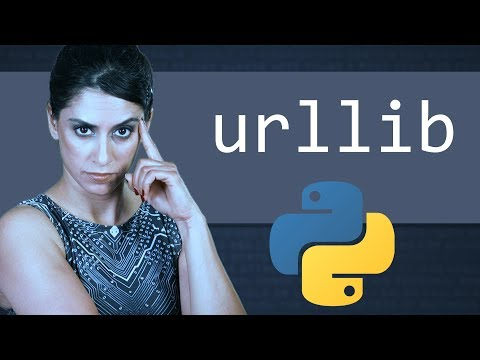

In [2]:
from IPython import display

video = display.YouTubeVideo('LosIGgon_KM')
video
display.HTML(f'<a href="{video.src}">link</a>')

The [URL handling modules](https://docs.python.org/3/library/urllib.html#module-urllib) in Python are under one module, `urllib`:

In [3]:
import urllib

help(urllib)

Help on package urllib:

NAME
    urllib

MODULE REFERENCE
    https://docs.python.org/3.7/library/urllib
    
    The following documentation is automatically generated from the Python
    source files.  It may be incomplete, incorrect or include features that
    are considered implementation detail and may vary between Python
    implementations.  When in doubt, consult the module reference at the
    location listed above.

PACKAGE CONTENTS
    error
    parse
    request
    response
    robotparser

FILE
    /home/rasx/anaconda3/lib/python3.7/urllib/__init__.py




The `request` module is our primary focus:

In [4]:
help(urllib.request)

Help on module urllib.request in urllib:

NAME
    urllib.request - An extensible library for opening URLs using a variety of protocols

MODULE REFERENCE
    https://docs.python.org/3.7/library/urllib.request
    
    The following documentation is automatically generated from the Python
    source files.  It may be incomplete, incorrect or include features that
    are considered implementation detail and may vary between Python
    implementations.  When in doubt, consult the module reference at the
    location listed above.

DESCRIPTION
    The simplest way to use this module is to call the urlopen function,
    which accepts a string containing a URL or a Request object (described
    below).  It opens the URL and returns the results as file-like
    object; the returned object has some extra methods described below.
    
    The OpenerDirector manages a collection of Handler objects that do
    all the actual work.  Each Handler implements a particular protocol or
    option.  Th

According to the help text above:

>The simplest way to use this module is to call the urlopen function, which accepts a string containing a URL or a Request object (described below).

In [5]:
from urllib import request

help(request.urlopen)

Help on function urlopen in module urllib.request:

urlopen(url, data=None, timeout=<object object at 0x7f9b28bb0d00>, *, cafile=None, capath=None, cadefault=False, context=None)
    Open the URL url, which can be either a string or a Request object.
    
    *data* must be an object specifying additional data to be sent to
    the server, or None if no such data is needed.  See Request for
    details.
    
    urllib.request module uses HTTP/1.1 and includes a "Connection:close"
    header in its HTTP requests.
    
    The optional *timeout* parameter specifies a timeout in seconds for
    blocking operations like the connection attempt (if not specified, the
    global default timeout setting will be used). This only works for HTTP,
    HTTPS and FTP connections.
    
    If *context* is specified, it must be a ssl.SSLContext instance describing
    the various SSL options. See HTTPSConnection for more details.
    
    The optional *cafile* and *capath* parameters specify a set of

We have already been using `open()` to open files, we will now use `urlopen()` for URLs:

In [10]:
resp = request.urlopen('https://wikipedia.org')

type(resp)

resp.code
resp.length

http.client.HTTPResponse

200

68882

Note that the type of response returned from `urlopen` is _not_ organized under `urllib.response`. Let’s take a look:

In [9]:
[i for i in dir(resp) if not(i.startswith('_'))]

['begin',
 'chunk_left',
 'chunked',
 'close',
 'closed',
 'code',
 'debuglevel',
 'detach',
 'fileno',
 'flush',
 'fp',
 'getcode',
 'getheader',
 'getheaders',
 'geturl',
 'headers',
 'info',
 'isatty',
 'isclosed',
 'length',
 'msg',
 'peek',
 'read',
 'read1',
 'readable',
 'readinto',
 'readinto1',
 'readline',
 'readlines',
 'reason',
 'seek',
 'seekable',
 'status',
 'tell',
 'truncate',
 'url',
 'version',
 'will_close',
 'writable',
 'write',
 'writelines']

Let us take a look at `.peek()`:

In [13]:
p = resp.peek()
p
type(p)

b'<!DOCTYPE html>\n<html lang="mul" class="no-js">\n<head>\n<meta charset="utf-8">\n<title>Wikipedia</title>\n<meta name="description" content="Wikipedia is a free online encyclopedia, created and edited by volunteers around the world and hosted by the Wikimedia Foundation.">\n<script>\ndocument.documentElement.className = document.documentElement.className.replace( /(^|\\s)no-js(\\s|$)/, "$1js-enabled$2" );\n</script>\n<meta name="viewport" content="initial-scale=1,user-scalable=yes">\n<link rel="apple-touch-icon" href="/static/apple-touch/wikipedia.png">\n<link rel="shortcut icon" href="/static/favicon/wikipedia.ico">\n<link rel="license" href="//creativecommons.org/licenses/by-sa/3.0/">\n<style>\n.sprite{background-image:url(portal/wikipedia.org/assets/img/sprite-46c49284.png);background-image:linear-gradient(transparent,transparent),url(portal/wikipedia.org/assets/img/sprite-46c49284.svg);background-repeat:no-repeat;display:inline-block;vertical-align:middle}.svg-Commons-logo_siste

bytes

Notice that `.peek()` returns an immutable byte array [📖 [docs](https://docs.python.org/3/library/functions.html#func-bytes)]. This is just a subset, a peek at the data returned entirely by `.read()`:

In [15]:
data = resp.read()
type(data)
len(data)

bytes

68882

We convert these `bytes` to `string` with `.decode()`:

In [20]:
html = data.decode('UTF-8')
type(html)
len(html)
html[:128]

str

67006

'<!DOCTYPE html>\n<html lang="mul" class="no-js">\n<head>\n<meta charset="utf-8">\n<title>Wikipedia</title>\n<meta name="description" '

Once `.read()` is called Python closes the connection. Any subsequent calls to `.read()` should return zero-length `bytes`:

In [22]:
data = resp.read()
len(data)
resp.isclosed()

0

True

Here is the URL for the YouTube video of this document:

In [23]:
video.src

'https://www.youtube.com/embed/LosIGgon_KM'

Our knowledge of YouTube URL conventions tells us that we can `watch` this video, `v`, at time `t`, 5 minutes, 28 seconds. The variables `v` and `t` can be stored in a dictionary:

In [25]:
query_string_params = {
    'v': video.id,
    't': '5m28s',
}

We will now use `parse.urlencode()` to convert this dictionary into an HTTP query string:

In [26]:
from urllib import parse

query_string = parse.urlencode(query_string_params)

query_string

'v=LosIGgon_KM&t=5m28s'